In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("../data/raw/train.csv")

In [3]:
# Kiểm tra tổng quan về cột LotFrontage
print("\n--- 1.1. Thống kê mô tả cột LotFrontage ---")
print(train['LotFrontage'].describe())


--- 1.1. Thống kê mô tả cột LotFrontage ---
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


In [4]:
# Kiểm tra số lượng giá trị thiếu
missing_frontage = train['LotFrontage'].isnull().sum()
total_rows = len(train)
print(f"\nGiá trị thiếu trong LotFrontage: {missing_frontage} ({missing_frontage/total_rows:.2%})")


Giá trị thiếu trong LotFrontage: 259 (17.74%)



--- 2.1. Ma trận tương quan của LotFrontage với các cột số ---
LotFrontage    1.000000
1stFlrSF       0.457181
LotArea        0.426095
GrLivArea      0.402797
SalePrice      0.351799
Name: LotFrontage, dtype: float64


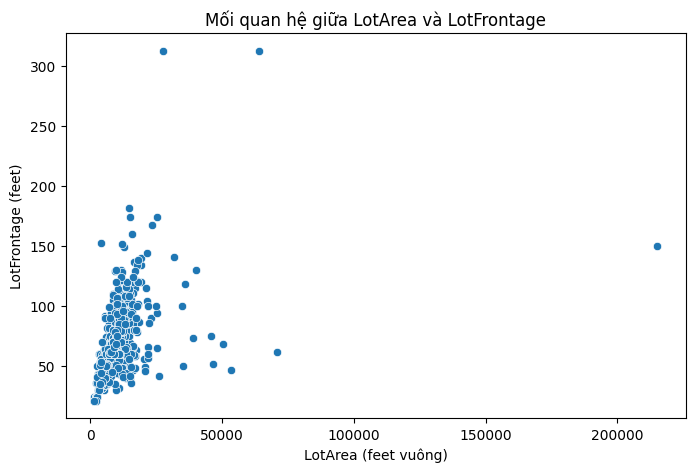

In [7]:
# ==============================================================================
# 2. Phân tích tương quan (Correlation) với các cột số
# ==============================================================================

numerical_cols_check = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
correlation_matrix = train[numerical_cols_check].corr()

print("\n--- 2.1. Ma trận tương quan của LotFrontage với các cột số ---")
print(correlation_matrix['LotFrontage'].sort_values(ascending=False))

# Biểu đồ phân tán (Scatter Plot) giữa LotFrontage và LotArea
plt.figure(figsize=(8, 5))
sns.scatterplot(x='LotArea', y='LotFrontage', data=train)
plt.title('Mối quan hệ giữa LotArea và LotFrontage')
plt.xlabel('LotArea (feet vuông)')
plt.ylabel('LotFrontage (feet)')
plt.show()


--- 3.1. LotFrontage trung bình/trung vị theo Neighborhood ---
                   mean  median  count
Neighborhood                          
NoRidge       91.878788    91.0     33
NridgHt       81.881579    88.5     76
Timber        80.133333    85.0     30
NWAmes        81.288889    80.0     45
ClearCr       83.461538    80.0     13
Crawfor       71.804878    74.0     41
Somerst       64.666667    73.5     78
NAmes         76.462366    73.0    186
Mitchel       70.083333    73.0     36
Sawyer        74.437500    71.0     48
CollgCr       71.682540    70.0    126
Veenker       59.714286    68.0      7
SawyerW       71.500000    66.5     50
Edwards       68.217391    65.5     92
Gilbert       79.877551    65.0     49
StoneBr       62.700000    61.5     20
IDOTRR        62.500000    60.0     34
OldTown       62.788991    60.0    109
SWISU         58.913043    60.0     23
BrkSide       57.509804    52.0     51
Blmngtn       47.142857    43.0     14
NPkVill       32.285714    24.0      7


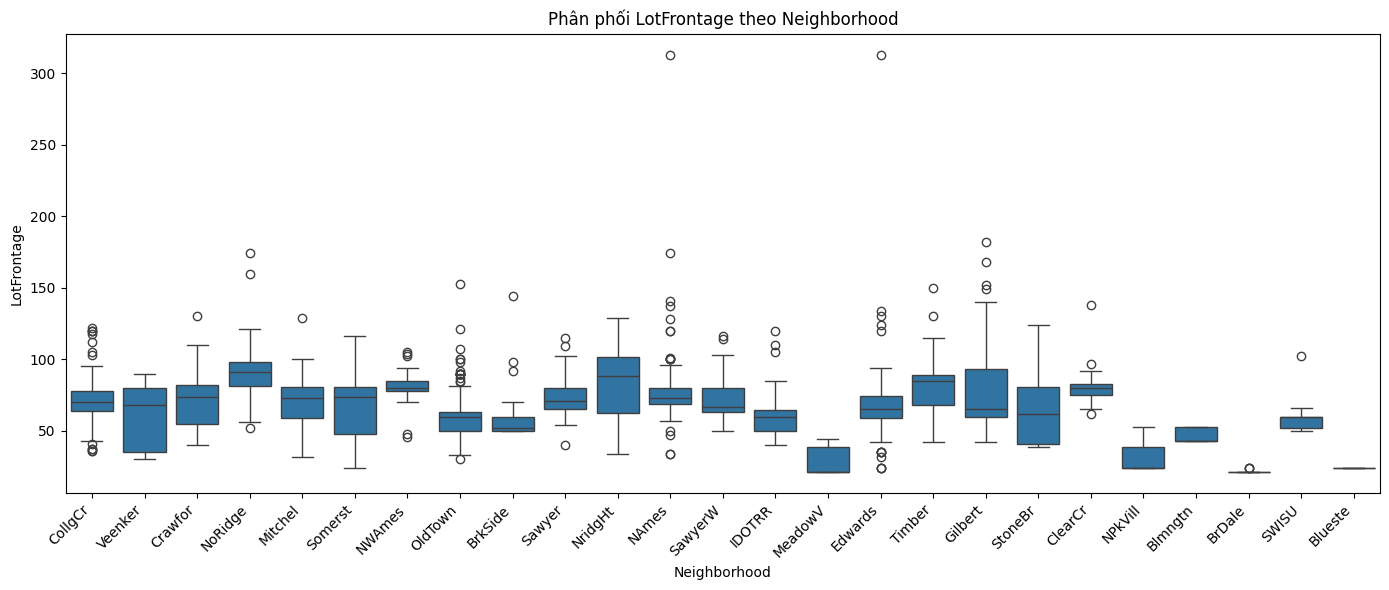


--- 3.2. LotFrontage trung bình/trung vị theo MSZoning ---
               mean  median  count
MSZoning                          
RL        74.680043    72.0    922
FV        59.491228    65.0     57
C (all)   69.700000    60.0     10
RH        58.923077    60.0     13
RM        52.366834    51.0    199

--- 3.3. LotFrontage trung bình/trung vị theo LotConfig ---
                mean  median  count
LotConfig                          
Corner     84.039801    80.0    201
Inside     67.715686    68.0    918
FR2        63.515152    64.0     33
FR3        70.750000    59.5      4
CulDSac    59.911111    50.0     45


In [10]:
# 3. Phân tích ảnh hưởng của các cột phân loại (Categorical)
# ==============================================================================

# Cột phân loại quan trọng: Neighborhood, MSZoning, LotConfig

# --- 3.1. Ảnh hưởng từ Neighborhood ---
neighborhood_mean_frontage = train.groupby('Neighborhood')['LotFrontage'].agg(['mean', 'median', 'count']).sort_values(by='median', ascending=False)
print("\n--- 3.1. LotFrontage trung bình/trung vị theo Neighborhood ---")
print(neighborhood_mean_frontage)

# Biểu đồ hộp (Box Plot) cho LotFrontage theo Neighborhood
plt.figure(figsize=(14, 6))
sns.boxplot(x='Neighborhood', y='LotFrontage', data=train)
plt.xticks(rotation=45, ha='right')
plt.title('Phân phối LotFrontage theo Neighborhood')
plt.tight_layout()
plt.show()

# --- 3.2. Ảnh hưởng từ MSZoning ---
mszoning_stats = train.groupby('MSZoning')['LotFrontage'].agg(['mean', 'median', 'count']).sort_values(by='median', ascending=False)
print("\n--- 3.2. LotFrontage trung bình/trung vị theo MSZoning ---")
print(mszoning_stats)

# --- 3.3. Ảnh hưởng từ LotConfig ---
lotconfig_stats = train.groupby('LotConfig')['LotFrontage'].agg(['mean', 'median', 'count']).sort_values(by='median', ascending=False)
print("\n--- 3.3. LotFrontage trung bình/trung vị theo LotConfig ---")
print(lotconfig_stats)